<a href="https://colab.research.google.com/github/aashwinmishra/cryoEM-notebooks/blob/master/TEM_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/aashwinmishra/cryoEM-notebooks

Cloning into 'cryoEM-notebooks'...
remote: Enumerating objects: 539, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 539 (delta 67), reused 109 (delta 56), pack-reused 400
Receiving objects: 100% (539/539), 144.71 MiB | 9.25 MiB/s, done.
Resolving deltas: 100% (283/283), done.
Updating files: 100% (88/88), done.


In [2]:
!git clone https://github.com/ViggieSmalls/TEM-Simulator

Cloning into 'TEM-Simulator'...
remote: Enumerating objects: 323, done.
remote: Total 323 (delta 0), reused 0 (delta 0), pack-reused 323
Receiving objects: 100% (323/323), 454.01 KiB | 7.09 MiB/s, done.
Resolving deltas: 100% (213/213), done.


In [3]:
!pip install mdtraj -q
!pip install mrcfile -q
!pip install PyCifRW -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.9-cp310-cp310-linux_x86_64.whl size=7547317 sha256=98b5424515f3b16f3bc0895653205ad8640deaf23a5ef4812d5bddbee70f7fe4
  Stored in directory: /root/.cache/pip/wheels/4b/4e/d5/22b44e04aca0780281ffb43717ebb3404bc1a77cf8f345fa73
Successfully built mdtraj


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
  Created wheel for PyCifRW: filename=PyCifRW-4.4.6-cp310-cp310-linux_x86_64.whl size=160870 sha256=5d235eb7cdc427bb869acd8c130c212c8c1b33f944f145d09dd5d63087174b8a
  Stored in directory: /root/.cache/pip/wheels/2b/6e/4e/808875fdfc5b8f3cf49958f1982a68a8046be44aba0443a4e3
Successfully built PyCifRW


In [6]:
import os
os.chdir('TEM-Simulator')

In [7]:
!cmake CMakeLists.txt

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Warning (dev) at /usr/local/lib/python3.10/dist-packages/cmake/data/share/cmake-3.27/Modules/ExternalProject.cmake:3136 (message):
  The DOWNLOAD_EXTRACT_TIMESTAMP option was not given and policy CMP0135 is
  not set.  The policy's OLD behavior will be used.  When using a URL
  download, the timestamps of extracted files should preferably be that of
  the time of extraction, otherwise code that depends on the extracted
  contents might not be rebuilt if the URL changes.  The OLD behav

In [8]:
!make

[  3%] Creating directories for 'libfftw3'
[  6%] Performing download step (download, verify and extract) for 'libfftw3'
-- Downloading...
   dst='/content/TEM-Simulator/fftw-3.3.7/src/fftw-3.3.7.tar.gz'
   timeout='none'
   inactivity timeout='none'
-- Using src='http://www.fftw.org/fftw-3.3.7.tar.gz'
-- [download 0% complete]
-- [download 1% complete]
-- [download 2% complete]
-- [download 5% complete]
-- [download 6% complete]
-- [download 7% complete]
-- [download 9% complete]
-- [download 10% complete]
-- [download 11% complete]
-- [download 13% complete]
-- [download 16% complete]
-- [download 17% complete]
-- [download 22% complete]
-- [download 23% complete]
-- [download 25% complete]
-- [download 26% complete]
-- [download 27% complete]
-- [download 28% complete]
-- [download 31% complete]
-- [download 32% complete]
-- [download 33% complete]
-- [download 34% complete]
-- [download 35% complete]
-- [download 37% complete]
-- [download 38% complete]
-- [download 39% complete]
-

In [47]:
os.chdir('/content/cryoEM-notebooks')

In [55]:
%matplotlib inline
import os, sys
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('../src/')
import src.simutils as simutils
import src.cryoemio as cryoemio
import src.dataviz as dataviz
from src.utils import write_inputfile as write_inputfile
from src.utils import write_coords as write_coords

In [63]:
x_coord, y_coord, z_coord = np.random.randint(low=-50, high=50, size=3).tolist()
x_theta, y_theta, z_theta = np.random.randint(low=0, high=90, size=3).tolist()
write_coords(x_coord=x_coord, y_coord=y_coord, z_coord=z_coord, x_theta=x_theta, y_theta=y_theta, z_theta=z_theta)

In [57]:
os.chdir('/content/TEM-Simulator')
!ls

CMakeCache.txt	cmake_install.cmake  COPYING	 INSTALLATION  manual.pdf  src
CMakeFiles	CMakeLists.txt	     fftw-3.3.7  Makefile      README.md   TEM-Simulator


In [64]:
os.system('{0} {1}'.format("./TEM-Simulator", "/content/cryoEM-notebooks/notebooks/Material/Data/TMV/input.txt"))

0

(1, 400, 400)


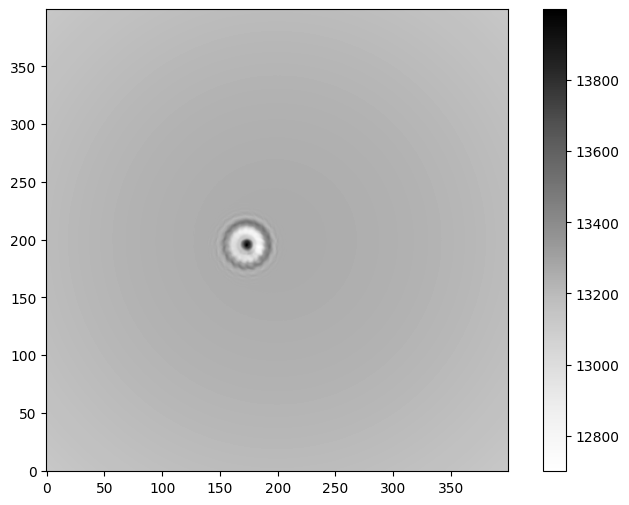

In [65]:
data = cryoemio.mrc2data(mrc_file = '/content/cryoEM-notebooks/notebooks/Material/Data/TMV/tiltseries_nonoise.mrc')
micrograph = data[0,...]
print(data.shape)
_fig = plt.figure(figsize=(9,6))
plt.imshow(micrograph, origin='lower', cmap='Greys')
plt.colorbar()